### Lab 6

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size = 22)
matplotlib.rc('figure', figsize = (18, 10))
from scipy import stats

### Problem 1

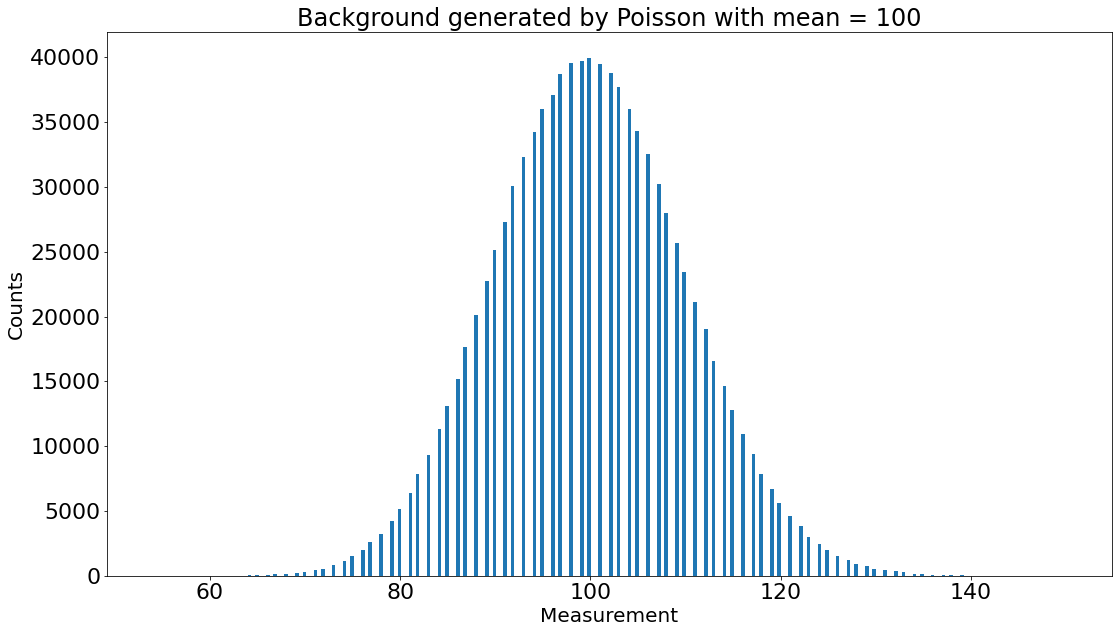

In [3]:
r = stats.poisson.rvs(100, size = 1000000)
plt.hist(r, bins = 250)
plt.ylabel("Counts", fontsize = '20')
plt.xlabel("Measurement", fontsize = '20')
plt.title("Background generated by Poisson with mean = 100", fontsize = '24')
plt.show()

5-sigma sensitivity threshold:

The probability of a 5-sigma event for a standard normal distribution is 0.9999997133484281. The value associated to a 5-sigma event for a poisson distribution with a mean around 100 is 154.0. Therefore, the 5-sigma sensitivity threshold for the generated background is 154.

In [4]:
sig = stats.norm.cdf(5)   
ans = stats.poisson.ppf(sig, 100)
print("Threshold sigma value: ", ans)

Threshold sigma value:  154.0


### Problem 2

### 2A:

We want to inject a signal with strength between 8-30 sigma range and inject into the background many times.
We need to generate a signal which will be counting particle events. This means that the signal will be Poisson distributed. 

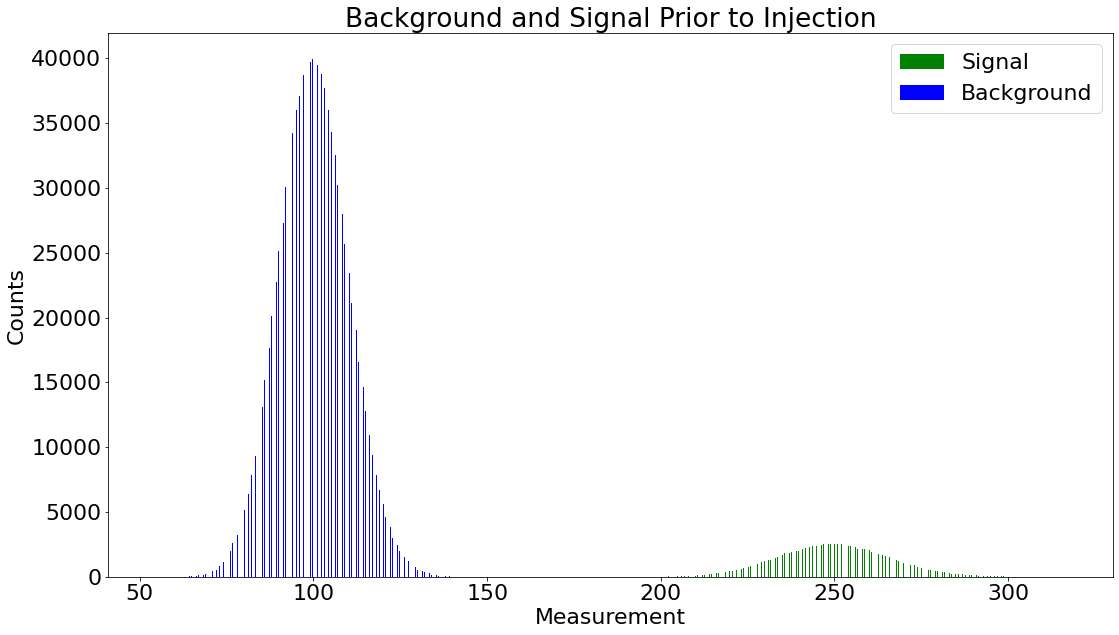

In [5]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean, size = 100000)
plt.hist([signal, r], bins = 400, color = ['green','blue'], label = ['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

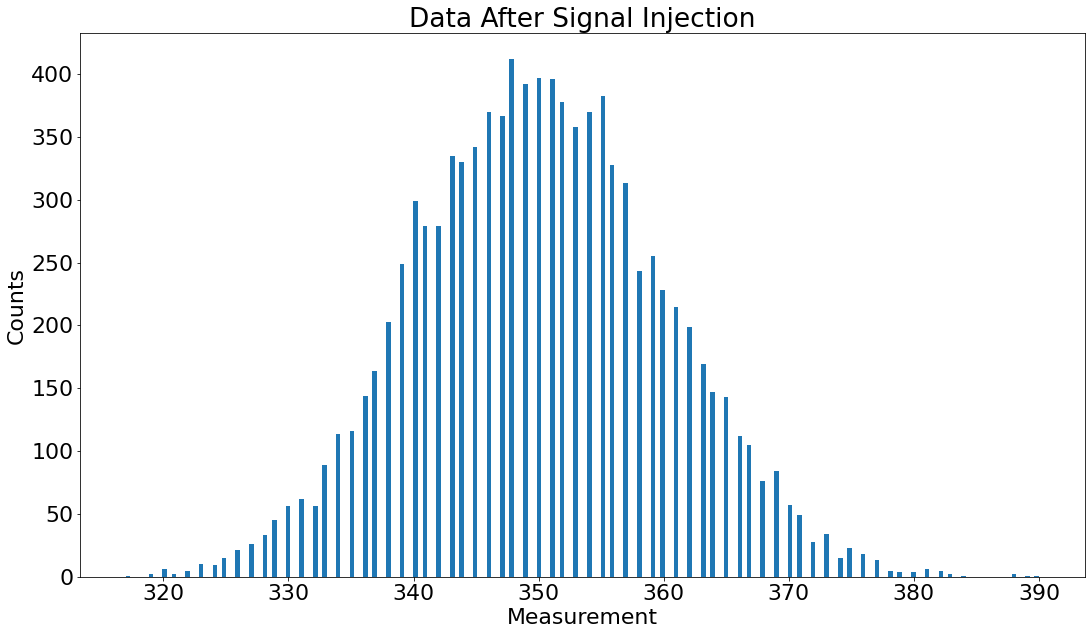

In [6]:
a1 = stats.poisson.rvs(100, size = 10000)
b1 = np.array([])
signal = 250
for i in a1:
    b1 = np.append(b1, i + signal)
    
plt.hist(b1, bins = 200)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

### 2 A/B:

There is bias in the observed signal. The mean has moved from 250 to 350. The distance it has moved to the right (100) is exactly the mean of the background distribution. On average, the background produces 100 particle events, so if on average the signal, independent of the background, produces 250 particle events, then since both events are happening at the same time, the overall number of observed particles in an average signal event, when we take the background into account, will be the sum of the particles from the background plus the particles from the signal, which on average is going to be 250 + 100 = 350. 


So it makes sense that the mean moves 100 units to the right for the signal. It retained its shape as a Poisson distribution because the sum of Poisson distributions is a Poisson distribution. The net effect of all of this is that the observed measurement is not a measurement of the signal, but a measurement of the signal plus background, so that the observed value is more likely to be STRONGER than the true injected signal. Even though it's a poisson distribution, due to the central limit theorem, the signal appears to be gaussian. However, one can notice the small activity at the right tail of the histogram at around 390, so it is in fact not a perfect Gaussian distribution.  For the large sample size that I have, it seems symmetric.

### Problem 3

### 3A:

The plotted histogram shows the probability of occurrence of any injected signal given any signal/measurement pair. The strongest relationship can be observed right along the highlighted diagonal for an injected signal to show up. Taking a sample point it, it seems that the offset between the injected signal and the observed signal is 100, which is the value of the mean of our poisson background distribution.

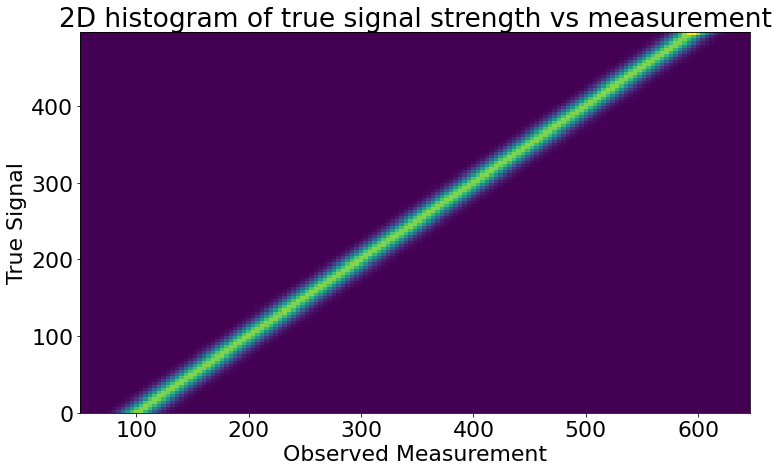

In [43]:
dist = stats.poisson(mu=100)
signal = stats.randint.rvs(size=10000000, low=0, high=500)
bkgd = dist.rvs(size=10000000)
data = bkgd + signal

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist2d(data, signal, bins=[np.arange(50,650,4), np.arange(0,500,4)])
ax.set_xlabel("Observed Measurement")
ax.set_ylabel("True Signal")
ax.set_title("2D histogram of true signal strength vs measurement");

### 3B:

In order to check with the results from Problem 2, we sample from the background many times and add to each sampled value the mean of the signal we had previously (250).

Text(0.5, 1.0, 'Histogram of observed data with 213 signal strength')

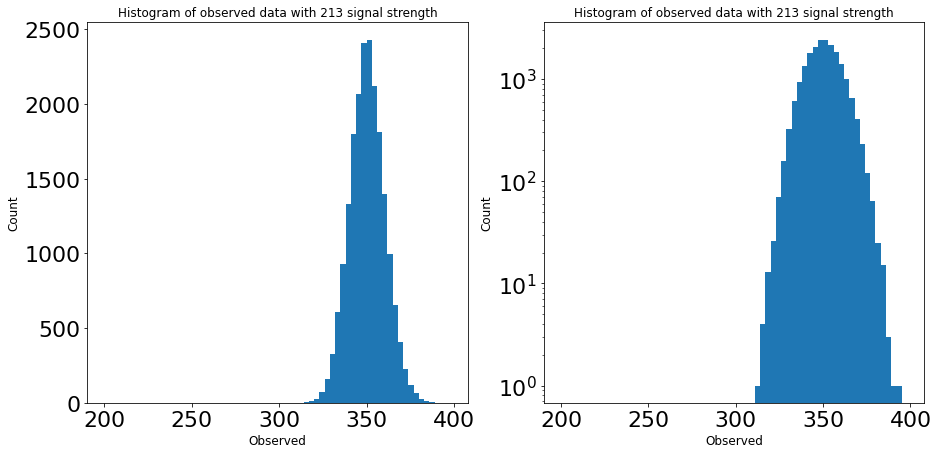

In [48]:
true = 250
fdata = data[signal == true]

fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[1].set_yscale('log')
for ax in axs:
    ax.hist(fdata, bins=np.arange(200, 400, 3))
    
axs[0].set_xlabel("Observed", fontsize = '12')
axs[0].set_ylabel("Count", fontsize = '12')
axs[0].set_title("Histogram of observed data with 213 signal strength", fontsize = '12' )
axs[1].set_xlabel("Observed", fontsize = '12')
axs[1].set_ylabel("Count", fontsize = '12')
axs[1].set_title("Histogram of observed data with 213 signal strength", fontsize = '12' )

### 3C:

We want to find out the distribution of possible signal strengths given a candidate observation. It is a histogram of signal strengths corresponding to simulated observations of candidate 350.

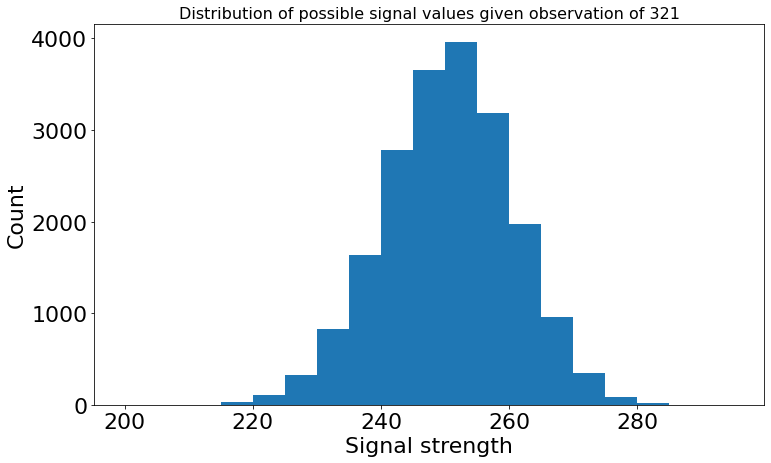

In [51]:
true = 350
fsignal = signal[data == true]

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.hist(fsignal, bins=np.arange(200, 300, 5))
ax.set_xlabel("Signal strength")
ax.set_ylabel("Count")
ax.set_title("Distribution of possible signal values given observation of 321", fontsize = '16');

### 3D & 3E:

We can start by normalizing to obtain a pdf. We can then integrate it from the mean to the 1 sigma probability on both sides. In this case the center is at 250.

In [59]:
new_mean = 400
bg_mean = 100
new_sample = stats.poisson.rvs(new_mean, size=10000)
al = np.array([])
for i in new_sample:
    al = np.append(al, i - bg_mean)

samp1 = stats.norm.cdf(1)
N = a1.size
r = 1
p = 0
while p < samp1:
    p = 0
    for i in al:
        if (i <= r + 300) and (i >= -r + 300):
            p += (1 / N)
    r += 1
print('We integrated up to a distance of {} units from the mean.'.format(r))

We integrated up to a distance of 29 units from the mean.


This range we integrated over gives the range of our 1 sigma uncertainty in the signal strength. To see this, observe that our sample is large enough to be practically representative of the true signal; the probability that the true signal gives a data point outside of our range is practically zero. This is the assumption made when we normalize our data and claim it to be a distribution. 

Next, this means we are assuming the true signal mean will lie somewhere among these values. Then, the fraction of all values of the distribution contained within some range ought to give the probability that the true mean lies in the range. So, we integrate on the distribution until we hit a 1 sigma probability to get a range that we are 1 sigma certain will contain the true mean. I made the assumption that the true distribution is approximately symmetric in this case, which we know to be true here, as we are dealing with Poisson distributions. This allowed us to integrate symmetrically outwards on the distribution from the mean. We also were able to deduce the mean of this particular signal exactly from previous parts, but in general, we would need to calculate the exact mean. Integrating out from the mean may also not be symmetric in all cases, but as there is a possibility the true signal strength lies above or below the mean here, and we know the signal to be symmetric here, then we can integrate symmetrically outwards from our known mean.